In [35]:
import numpy as np
import pandas as pd
import scipy as scp
import pickle 
import os
import matplotlib.pyplot as plt

In [5]:
tt = pd.read_csv('/media/data_cifs/afengler/data/real/HDDMDATA.csv')

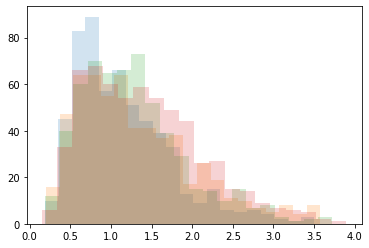

In [46]:
# 
for i in range(1, 5, 1):
    plt.hist(tt.loc[tt['condi'] == i]['rt'].ravel(), alpha = 0.2, bins = 20)

In [48]:
# def bin_simulator_output(out = [0, 0],
#                          bin_dt = 0.04,
#                          n_bins = 0,
#                          eps_correction = 1e-7, # min p for a bin
#                          params = ['v', 'a', 'w', 'ndt']
#                         ): # ['v', 'a', 'w', 'ndt', 'angle']

#     # Generate bins
#     if n_bins == 0:
#         n_bins = int(out[2]['max_t'] / bin_dt)
#         bins[:nbins] = np.linspace(0, out[2]['max_t'], n_bins)
#     else:    
#         bins = np.linspace(0, out[2]['max_t'], n_bins)
#         bins = np.append(bins, [100])
#         print(bins)
#     counts = []
#     cnt = 0
#     counts = np.zeros( (n_bins, len(out[2]['possible_choices']) ) )
#     counts_size = counts.shape[0] * counts.shape[1]
    
#     for choice in out[2]['possible_choices']:
#         counts[:, cnt] = np.histogram(out[0][out[1] == choice], bins = bins)[0] / out[2]['n_samples']
#         cnt += 1
    
#     # Apply correction for empty bins
#     n_small = 0
#     n_big = 0
#     n_small = np.sum(counts < eps_correction)
#     n_big = counts_size - n_small 
    
#     if eps_correction > 0:
#         counts[counts <= eps_correction] = eps_correction
#         counts[counts > eps_correction] -= (eps_correction * (n_small / n_big))

#     return ([out[2][param] for param in params], # features
#             counts, # labels
#             {'max_t': out[2]['max_t'], 
#              'bin_dt': bin_dt, 
#              'n_samples': out[2]['n_samples']} # meta data
#            )


def bin_simulator_output(out = [0, 0],
                         bin_dt = 0.04,
                         choices = [-1, 1],
                         max_t = 20,
                         nbins = 0): # ['v', 'a', 'w', 'ndt', 'angle']
        
        # Generate bins
        if nbins == 0:
            nbins = int(max_t / bin_dt)
            bins = np.zeros(nbins + 1)
            bins[:nbins] = np.linspace(0, max_t, nbins)
            bins[nbins] = np.inf
        else:  
            bins = np.zeros(nbins + 1)
            bins[:nbins] = np.linspace(0, max_t, nbins)
            bins[nbins] = np.inf

        cnt = 0
        counts = np.zeros( (nbins, len(choices)) )

        for choice in choices:
            counts[:, cnt] = np.histogram(out[0][out[1] == choice], bins = bins)[0]
            cnt += 1
        return counts

In [65]:
out = [np.array(tt['rt'])]
out.append(np.array(tt['response']))
#out = np.array(tt[['rt', 'response']])

In [123]:
data_binned = np.zeros((len(np.unique(tt['condi'])), 512, 2))
data = dict()

for i in range(4):
    out = [np.array(tt.loc[tt['condi'] == i + 1]['rt'])]
    out.append(np.array(tt.loc[tt['condi'] == i + 1]['response']))
    data_binned[i, :, :] = bin_simulator_output(out = out,
                                                bin_dt = 0.04,
                                                choices = np.unique((tt['response'])),
                                                max_t = 20,
                                                nbins = 512)
    data[i] = np.array(tt.loc[tt['condi'] == i + 1][['rt', 'response']])
    
# data_out.append(test)
# data_out.append(tt)

# Save data
pickle.dump([data, tt], open('/media/data_cifs/afengler/data/real/hddmdata.pickle', 'wb'), protocol = 3)
pickle.dump([data_binned, tt], open('/media/data_cifs/afengler/data/real/hddmdata_binned.pickle', 'wb'), protocol = 2)

In [89]:
dat = pickle.load(open('/media/data_cifs/afengler/data/real/hddmdata.pickle', 'rb'))

In [115]:
np.array(tt.loc[tt['condi'] == 1][['rt', 'response']])

array([[1.108, 1.   ],
       [1.653, 1.   ],
       [2.094, 1.   ],
       ...,
       [0.902, 1.   ],
       [1.034, 1.   ],
       [0.955, 1.   ]])

In [122]:
data[4]

KeyError: 4

In [63]:
#np.unique(out[:, 1])

array([-1.,  1.])

In [97]:
for i in zip({'a': [20], 'b': [20]} , np.zeros((2, 10, 2))):
    print(i)

('a', array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]]))
('b', array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]]))


In [105]:
ha = {1: 10, '1': 9}

In [108]:
ha.insert({10:10})

AttributeError: 'dict' object has no attribute 'insert'

In [110]:
ha = dict()

In [111]:
ha[1] = 10

In [112]:
ha[1]

10